In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('data/merged.csv')
df

,Zip Code,City,Pills,Tax Returns,AGI thousands,Population,Death Rate
0,94550,LIVERMORE,52022690,21341,2066480,46896,1.63
1,90242,DOWNEY,21791650,17767,726095,43497,2.65
2,92010,CARLSBAD,10548200,6737,495599,14382,12.55
3,95350,MODESTO,6547370,20938,891634,51046,2.19
4,95825,SACRAMENTO,6087880,13817,591794,31084,2.75
...,...,...,...,...,...,...,...
668,95033,LOS GATOS,200,4012,552488,9372,5.35
669,93725,FRESNO,180,9020,280513,24979,4.43
670,95215,STOCKTON,130,8467,316574,23224,35.97
671,94930,FAIRFAX,100,4029,319932,8500,5.44


,Zip Code,City,Pills,Tax Returns,AGI thousands,Population,Death Rate,Group
34,95422,CLEARLAKE,3453660,4353,124682,15585,55.07,Low


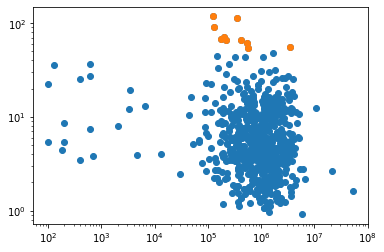

In [67]:
plt.plot(df['Pills'], df['Death Rate'], 'o')
topten = df.sort_values(by=['Death Rate']).tail(10)
#print(topten)
plt.plot(topten['Pills'], topten['Death Rate'], 'o')

plt.xscale('log')
plt.yscale('log')

from scipy import stats
stats.ttest_1samp(topten['Pills'], df['Pills'].mean())
topten[topten['Pills'] > df['Pills'].mean()]


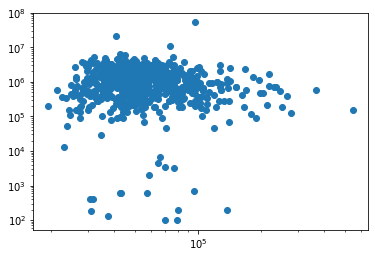

In [43]:
pop_income = df['AGI thousands'] * 1e3 / df['Tax Returns']
plt.plot(pop_income, df['Pills'], 'o')
plt.xscale('log')
plt.yscale('log')

0      False
1       True
2      False
3       True
4       True
       ...  
668    False
669     True
670     True
671    False
672    False
Length: 673, dtype: bool

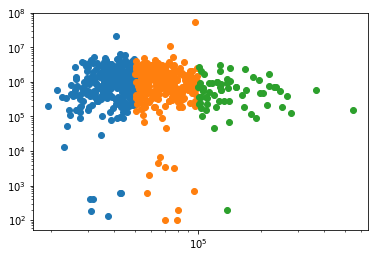

In [61]:
w1 = pop_income < 50000
w2 = (pop_income >= 50000) & (pop_income < 100000)
w3 = pop_income >= 100000

plt.plot(pop_income[w1], df['Pills'][w1], 'o')
plt.plot(pop_income[w2], df['Pills'][w2], 'o')
plt.plot(pop_income[w3], df['Pills'][w3], 'o')

plt.xscale('log')
plt.yscale('log')
w1

In [48]:
stats.f_oneway(df['Pills'][w1], df['Pills'][w2], df['Pills'][w3])

F_onewayResult(statistic=2.535346741464911, pvalue=0.07999422215679314)

In [51]:
df['Group'] = ''

In [57]:
df['Group'][w1] = 'Low'
df['Group'][w2] = 'Medium'
df['Group'][w3] = 'High'
df

/Users/djaimes/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/djaimes/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/djaimes/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate f

,Zip Code,City,Pills,Tax Returns,AGI thousands,Population,Death Rate,Group
0,94550,LIVERMORE,52022690,21341,2066480,46896,1.63,Medium
1,90242,DOWNEY,21791650,17767,726095,43497,2.65,Low
2,92010,CARLSBAD,10548200,6737,495599,14382,12.55,Medium
3,95350,MODESTO,6547370,20938,891634,51046,2.19,Low
4,95825,SACRAMENTO,6087880,13817,591794,31084,2.75,Low
...,...,...,...,...,...,...,...,...
668,95033,LOS GATOS,200,4012,552488,9372,5.35,High
669,93725,FRESNO,180,9020,280513,24979,4.43,Low
670,95215,STOCKTON,130,8467,316574,23224,35.97,Low
671,94930,FAIRFAX,100,4029,319932,8500,5.44,Medium


(100000.0, 10000000.0)

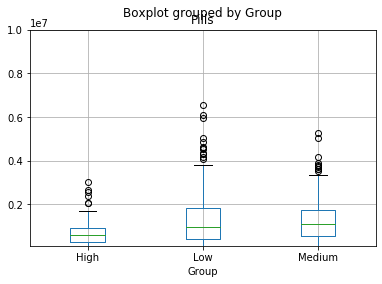

In [60]:
df.boxplot('Pills', by='Group')
plt.ylim(1e5, 1e7)

In [62]:
df

,Zip Code,City,Pills,Tax Returns,AGI thousands,Population,Death Rate,Group
0,94550,LIVERMORE,52022690,21341,2066480,46896,1.63,Medium
1,90242,DOWNEY,21791650,17767,726095,43497,2.65,Low
2,92010,CARLSBAD,10548200,6737,495599,14382,12.55,Medium
3,95350,MODESTO,6547370,20938,891634,51046,2.19,Low
4,95825,SACRAMENTO,6087880,13817,591794,31084,2.75,Low
...,...,...,...,...,...,...,...,...
668,95033,LOS GATOS,200,4012,552488,9372,5.35,High
669,93725,FRESNO,180,9020,280513,24979,4.43,Low
670,95215,STOCKTON,130,8467,316574,23224,35.97,Low
671,94930,FAIRFAX,100,4029,319932,8500,5.44,Medium


In [63]:
df.to_csv('mydf.csv', index=False)